In [1]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import backend as K
#K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
import pandas as pd
import csv
from os.path import splitext
from sklearn.preprocessing import LabelEncoder
from PIL import Image

Using TensorFlow backend.


In [2]:
# Load training and test data into dataframes
PATH = os.getcwd()
from keras.utils import to_categorical
df = pd.read_csv(PATH + '\\CNN-image-dataset.csv');
data_train = df[0:5000]
data_test = df[5001:]

# X forms the training images, and y forms the training labels
X = np.array(data_train.iloc[:, 2:])
y = to_categorical(np.array(data_train.iloc[:, 1]))

# Here I split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# X_test forms the test images, and y_test forms the test labels
X_test = np.array(data_test.iloc[:, 2:])
y_test = to_categorical(np.array(data_test.iloc[:, 1]))

In [3]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

In [4]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_val.shape)

(4000, 28, 28, 1)
(5000, 28, 28, 1)
(1000, 28, 28, 1)
(1000, 3)


In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(3, activation='softmax'))

In [9]:

cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [11]:

history3 = cnn3.fit(X_train, y_train,
          batch_size=256,
          epochs=50,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 4s 893us/step - loss: 0.6392 - acc: 0.7900 - val_loss: 0.5941 - val_acc: 0.8130
Epoch 2/50
4000/4000 [==============================] - 4s 896us/step - loss: 0.6378 - acc: 0.7900 - val_loss: 0.5950 - val_acc: 0.8130
Epoch 3/50
4000/4000 [==============================] - 4s 882us/step - loss: 0.6351 - acc: 0.7900 - val_loss: 0.5957 - val_acc: 0.8130
Epoch 4/50
4000/4000 [==============================] - 4s 880us/step - loss: 0.6346 - acc: 0.7900 - val_loss: 0.6046 - val_acc: 0.8130
Epoch 5/50
4000/4000 [==============================] - 3s 869us/step - loss: 0.6378 - acc: 0.7900 - val_loss: 0.5960 - val_acc: 0.8130
Epoch 6/50
4000/4000 [==============================] - 3s 872us/step - loss: 0.6371 - acc: 0.7900 - val_loss: 0.5932 - val_acc: 0.8130
Epoch 7/50
4000/4000 [==============================] - 3s 867us/step - loss: 0.6339 - acc: 0.7900 - val_loss: 0.5958 - val_acc: 0.8130


In [13]:
score3 = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.027770305449631997
Test accuracy: 0.9944


50


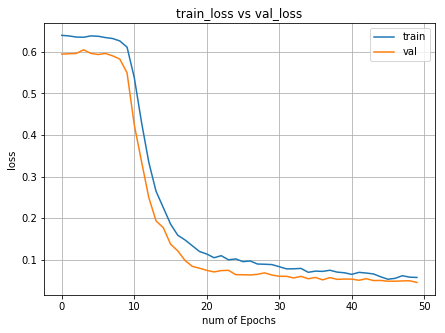

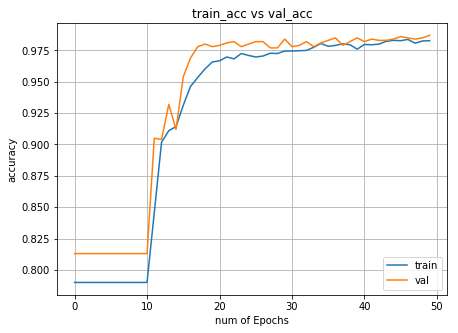

In [15]:
# visualizing losses and accuracy
train_loss=history3.history['loss']
val_loss=history3.history['val_loss']
train_acc=history3.history['acc']
val_acc=history3.history['val_acc']
xc=range(50)
print(len(train_loss))
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
#plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)

In [16]:
# get the predictions for the test data
predicted_classes = cnn3.predict_classes(X_test)

# get the indices to be plotted
y_true = data_test.iloc[:, 1].values
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [17]:
len(correct)

4972

In [18]:
len(incorrect)

28